<a href="https://colab.research.google.com/github/mirkhalilrehman/GANS-Implementation-Pokemon/blob/main/Pokemon_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 43.1 MB/s eta 0:00:00


In [3]:
import torch
import numpy as np
import torch.nn as nn
import torchvision
import torchmetrics
import matplotlib.pyplot as plt

In [4]:
def dc_gen_block(in_dim, out_dim, kernel_size, stride):
    return nn.Sequential(
        nn.ConvTranspose2d(in_dim, out_dim, kernel_size, stride=stride),
        nn.BatchNorm2d(out_dim),
        nn.ReLU()
    )

In [5]:
class DCGenerator(nn.Module):
    def __init__(self, in_dim, kernel_size=4, stride=2):
        super(DCGenerator, self).__init__()
        self.in_dim = in_dim
        self.gen = nn.Sequential(
            dc_gen_block(in_dim, 1024, kernel_size, stride),
            dc_gen_block(1024, 512, kernel_size, stride),
            # Add last generator block
            dc_gen_block(512,256,kernel_size,stride),
            # Add transposed convolution
            nn.ConvTranspose2d(256, 3, kernel_size, stride=stride),
            # Add tanh activation
            nn.Tanh()
        )



    def forward(self, x):
        x = x.view(len(x), self.in_dim, 1, 1)
        return self.gen(x)

In [6]:
def dc_disc_block(in_dim, out_dim, kernel_size, stride):
    return nn.Sequential(
        nn.Conv2d(in_dim, out_dim, kernel_size, stride=stride),
        nn.BatchNorm2d(out_dim),
        nn.LeakyReLU(0.2),
    )

In [7]:
class DCDiscriminator(nn.Module):
    def __init__(self, kernel_size=4, stride=2):
        super(DCDiscriminator, self).__init__()
        self.disc = nn.Sequential(
          	# Add first discriminator block
            dc_disc_block(3, 512, kernel_size, stride),
            dc_disc_block(512, 1024, kernel_size, stride),
          	# Add a convolution
            nn.Conv2d(1024, 1, kernel_size, stride=stride),
        )


    def forward(self, x):
        # Pass input through sequential block
        x = self.disc(x)
        return x.view(len(x), -1)

In [16]:
def gen_loss(gen, disc, num_images, z_dim):
    # Define random noise
    noise = torch.rand(num_images, z_dim).to(device)

    # Generate fake image
    fake = gen(noise)
    # Get discriminator's prediction on the fake image
    disc_pred =disc(fake)
    # Compute generator loss
    criterion = nn.BCEWithLogitsLoss()
    gen_loss = criterion(disc_pred, torch.ones_like(disc_pred))
    return gen_loss

def disc_loss(gen, disc, real, num_images, z_dim):
    criterion = nn.BCEWithLogitsLoss()
    noise = torch.randn(num_images, z_dim).to(device)
    fake = gen(noise)
    # Get discriminator's predictions for fake images
    disc_pred_fake = disc(fake)
    # Calculate the fake loss component
    fake_loss = criterion(disc_pred_fake,torch.zeros_like(disc_pred_fake))
    # Get discriminator's predictions for real images
    disc_pred_real = disc(real)
    # Calculate the real loss component
    real_loss = criterion(disc_pred_real,torch.ones_like(disc_pred_real))
    disc_loss = (real_loss + fake_loss) / 2
    return disc_loss

In [9]:

# Define Transformations
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(64),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/pokemons/pokemon/", transform=transform)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True)

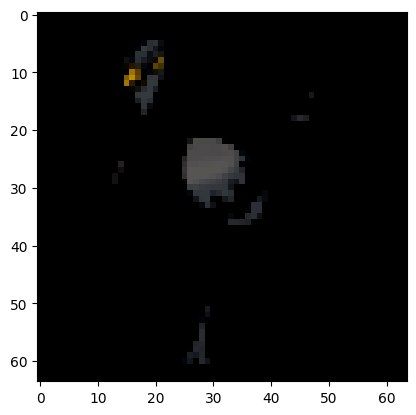

In [10]:
dataiter=iter(dataloader)
images,_=next(dataiter)
plt.imshow(images[10].permute(1,2,0))

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device



device(type='cuda')

In [12]:
# Models
gen = DCGenerator(in_dim=16).to(device)
disc = DCDiscriminator().to(device)

# Optimizers
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [45]:
def denormalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)  # t = t * s + m
    return tensor

Epoch 1/500


100%|██████████| 7/7 [00:11<00:00,  1.61s/it]


Epoch 1: Generator Loss: 0.2856, Discriminator Loss: 0.0617
Epoch 2/500


100%|██████████| 7/7 [00:11<00:00,  1.60s/it]


Epoch 2: Generator Loss: 1.2428, Discriminator Loss: 0.4735
Epoch 3/500


100%|██████████| 7/7 [00:11<00:00,  1.59s/it]


Epoch 3: Generator Loss: 1.5123, Discriminator Loss: 0.3828
Epoch 4/500


100%|██████████| 7/7 [00:11<00:00,  1.59s/it]


Epoch 4: Generator Loss: 1.2099, Discriminator Loss: 0.2524
Epoch 5/500


100%|██████████| 7/7 [00:11<00:00,  1.57s/it]


Epoch 5: Generator Loss: 2.8134, Discriminator Loss: 0.5822
Epoch 6/500


100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


Epoch 6: Generator Loss: 2.3666, Discriminator Loss: 0.1781
Epoch 7/500


100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


Epoch 7: Generator Loss: 2.3725, Discriminator Loss: 0.4061
Epoch 8/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Epoch 8: Generator Loss: 2.3853, Discriminator Loss: 0.5466
Epoch 9/500


100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


Epoch 9: Generator Loss: 1.6076, Discriminator Loss: 0.2158
Epoch 10/500


100%|██████████| 7/7 [00:11<00:00,  1.61s/it]


Epoch 10: Generator Loss: 2.2656, Discriminator Loss: 0.8546
Epoch 11/500


100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


Epoch 11: Generator Loss: 1.2116, Discriminator Loss: 0.4235
Epoch 12/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Epoch 12: Generator Loss: 1.1498, Discriminator Loss: 0.5011
Epoch 13/500


100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


Epoch 13: Generator Loss: 0.5850, Discriminator Loss: 0.2013
Epoch 14/500


100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


Epoch 14: Generator Loss: 0.5462, Discriminator Loss: 0.1659
Epoch 15/500


100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


Epoch 15: Generator Loss: 1.0419, Discriminator Loss: 0.5043
Epoch 16/500


100%|██████████| 7/7 [00:11<00:00,  1.59s/it]


Epoch 16: Generator Loss: 0.5582, Discriminator Loss: 0.0768
Epoch 17/500


100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


Epoch 17: Generator Loss: 0.5788, Discriminator Loss: 0.1106
Epoch 18/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Epoch 18: Generator Loss: 1.4505, Discriminator Loss: 0.7464
Epoch 19/500


100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


Epoch 19: Generator Loss: 1.1441, Discriminator Loss: 0.4993
Epoch 20/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 20: Generator Loss: 0.7688, Discriminator Loss: 0.1202
Epoch 21/500


100%|██████████| 7/7 [00:11<00:00,  1.61s/it]


Epoch 21: Generator Loss: 0.7221, Discriminator Loss: 0.1008
Epoch 22/500


100%|██████████| 7/7 [00:11<00:00,  1.61s/it]


Epoch 22: Generator Loss: 0.7688, Discriminator Loss: 0.0945
Epoch 23/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 23: Generator Loss: 1.7468, Discriminator Loss: 0.5370
Epoch 24/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Epoch 24: Generator Loss: 0.8565, Discriminator Loss: 0.2174
Epoch 25/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Epoch 25: Generator Loss: 0.5929, Discriminator Loss: 0.1064
Epoch 26/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 26: Generator Loss: 0.6496, Discriminator Loss: 0.1465
Epoch 27/500


100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


Epoch 27: Generator Loss: 1.0684, Discriminator Loss: 0.2254
Epoch 28/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Epoch 28: Generator Loss: 1.4874, Discriminator Loss: 0.5989
Epoch 29/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 29: Generator Loss: 0.8978, Discriminator Loss: 0.2836
Epoch 30/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 30: Generator Loss: 1.2081, Discriminator Loss: 0.3890
Epoch 31/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 31: Generator Loss: 1.0021, Discriminator Loss: 0.3695
Epoch 32/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Epoch 32: Generator Loss: 0.3274, Discriminator Loss: 0.1050
Epoch 33/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Epoch 33: Generator Loss: 1.2788, Discriminator Loss: 0.4147
Epoch 34/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Epoch 34: Generator Loss: 1.1494, Discriminator Loss: 0.6646
Epoch 35/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Epoch 35: Generator Loss: 0.7904, Discriminator Loss: 0.4071
Epoch 36/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 36: Generator Loss: 0.5270, Discriminator Loss: 0.2080
Epoch 37/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 37: Generator Loss: 1.4288, Discriminator Loss: 0.5032
Epoch 38/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 38: Generator Loss: 1.7387, Discriminator Loss: 0.3806
Epoch 39/500


100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


Epoch 39: Generator Loss: 2.4551, Discriminator Loss: 0.7958
Epoch 40/500


100%|██████████| 7/7 [00:11<00:00,  1.61s/it]


Epoch 40: Generator Loss: 1.0143, Discriminator Loss: 0.3853
Epoch 41/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 41: Generator Loss: 0.5106, Discriminator Loss: 0.2611
Epoch 42/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Epoch 42: Generator Loss: 0.0811, Discriminator Loss: 0.0660
Epoch 43/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 43: Generator Loss: 0.0446, Discriminator Loss: 0.0323
Epoch 44/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 44: Generator Loss: 0.0683, Discriminator Loss: 0.0336
Epoch 45/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Epoch 45: Generator Loss: 0.0422, Discriminator Loss: 0.0190
Epoch 46/500


100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


Epoch 46: Generator Loss: 0.0404, Discriminator Loss: 0.0172
Epoch 47/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 47: Generator Loss: 0.0394, Discriminator Loss: 0.0150
Epoch 48/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 48: Generator Loss: 0.0344, Discriminator Loss: 0.0152
Epoch 49/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Epoch 49: Generator Loss: 0.0304, Discriminator Loss: 0.0137
Epoch 50/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]

Epoch 50: Generator Loss: 0.0329, Discriminator Loss: 0.0142


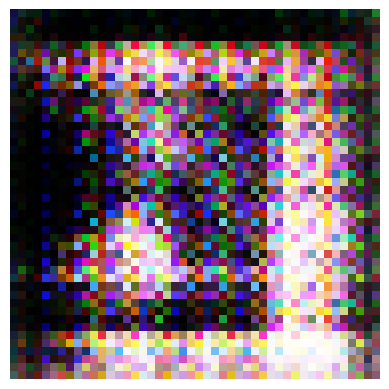

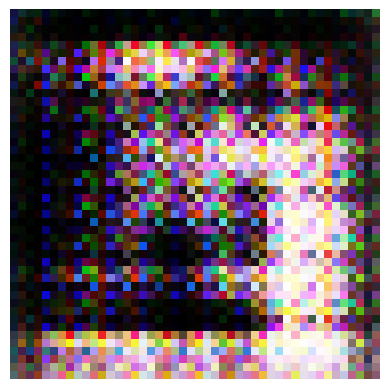

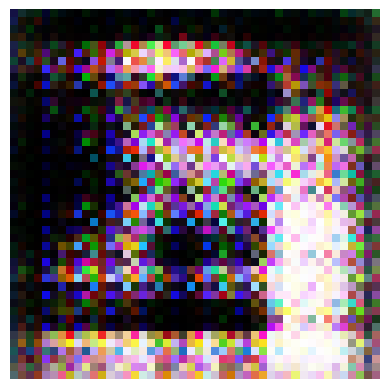

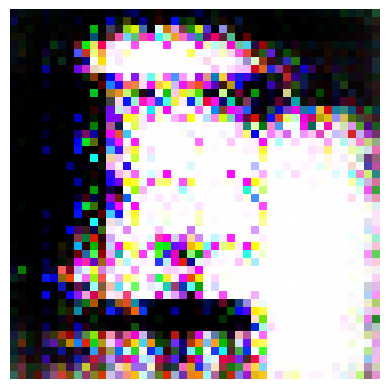

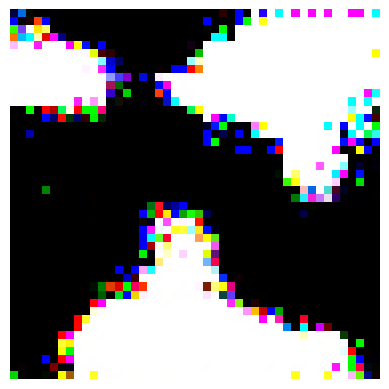

Epoch 51/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Epoch 51: Generator Loss: 0.0315, Discriminator Loss: 0.0125
Epoch 52/500


100%|██████████| 7/7 [00:11<00:00,  1.61s/it]


Epoch 52: Generator Loss: 0.0382, Discriminator Loss: 0.0128
Epoch 53/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 53: Generator Loss: 0.0250, Discriminator Loss: 0.0100
Epoch 54/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 54: Generator Loss: 0.0597, Discriminator Loss: 0.0157
Epoch 55/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 55: Generator Loss: 0.0539, Discriminator Loss: 0.0172
Epoch 56/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 56: Generator Loss: 0.0464, Discriminator Loss: 0.0149
Epoch 57/500


100%|██████████| 7/7 [00:11<00:00,  1.67s/it]


Epoch 57: Generator Loss: 0.0709, Discriminator Loss: 0.0177
Epoch 58/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 58: Generator Loss: 0.1627, Discriminator Loss: 0.0286
Epoch 59/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 59: Generator Loss: 1.7153, Discriminator Loss: 0.8023
Epoch 60/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 60: Generator Loss: 0.8592, Discriminator Loss: 0.1011
Epoch 61/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 61: Generator Loss: 0.3647, Discriminator Loss: 0.0687
Epoch 62/500


100%|██████████| 7/7 [00:11<00:00,  1.66s/it]


Epoch 62: Generator Loss: 0.4715, Discriminator Loss: 0.1014
Epoch 63/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Epoch 63: Generator Loss: 0.2861, Discriminator Loss: 0.0852
Epoch 64/500


100%|██████████| 7/7 [00:11<00:00,  1.66s/it]


Epoch 64: Generator Loss: 0.2760, Discriminator Loss: 0.1133
Epoch 65/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 65: Generator Loss: 0.1458, Discriminator Loss: 0.0785
Epoch 66/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 66: Generator Loss: 0.1066, Discriminator Loss: 0.0473
Epoch 67/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 67: Generator Loss: 0.1192, Discriminator Loss: 0.0514
Epoch 68/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 68: Generator Loss: 0.1933, Discriminator Loss: 0.0624
Epoch 69/500


100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


Epoch 69: Generator Loss: 2.5340, Discriminator Loss: 1.7405
Epoch 70/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 70: Generator Loss: 1.0318, Discriminator Loss: 0.2847
Epoch 71/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 71: Generator Loss: 0.7680, Discriminator Loss: 0.1803
Epoch 72/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 72: Generator Loss: 1.1632, Discriminator Loss: 0.2211
Epoch 73/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 73: Generator Loss: 0.9847, Discriminator Loss: 0.4771
Epoch 74/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 74: Generator Loss: 1.4425, Discriminator Loss: 0.5360
Epoch 75/500


100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


Epoch 75: Generator Loss: 1.0704, Discriminator Loss: 0.2858
Epoch 76/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 76: Generator Loss: 0.9525, Discriminator Loss: 0.3892
Epoch 77/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 77: Generator Loss: 0.5471, Discriminator Loss: 0.2164
Epoch 78/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 78: Generator Loss: 0.2915, Discriminator Loss: 0.0815
Epoch 79/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 79: Generator Loss: 0.1807, Discriminator Loss: 0.0431
Epoch 80/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 80: Generator Loss: 0.2105, Discriminator Loss: 0.0532
Epoch 81/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Epoch 81: Generator Loss: 0.2897, Discriminator Loss: 0.0798
Epoch 82/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 82: Generator Loss: 0.2960, Discriminator Loss: 0.0523
Epoch 83/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 83: Generator Loss: 0.2133, Discriminator Loss: 0.0361
Epoch 84/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 84: Generator Loss: 0.1402, Discriminator Loss: 0.0294
Epoch 85/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 85: Generator Loss: 0.1032, Discriminator Loss: 0.0201
Epoch 86/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 86: Generator Loss: 0.0645, Discriminator Loss: 0.0163
Epoch 87/500


100%|██████████| 7/7 [00:11<00:00,  1.61s/it]


Epoch 87: Generator Loss: 0.0465, Discriminator Loss: 0.0112
Epoch 88/500


100%|██████████| 7/7 [00:11<00:00,  1.67s/it]


Epoch 88: Generator Loss: 0.0403, Discriminator Loss: 0.0108
Epoch 89/500


100%|██████████| 7/7 [00:11<00:00,  1.66s/it]


Epoch 89: Generator Loss: 0.0419, Discriminator Loss: 0.0102
Epoch 90/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 90: Generator Loss: 0.0440, Discriminator Loss: 0.0092
Epoch 91/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 91: Generator Loss: 0.0401, Discriminator Loss: 0.0081
Epoch 92/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 92: Generator Loss: 0.0338, Discriminator Loss: 0.0082
Epoch 93/500


100%|██████████| 7/7 [00:11<00:00,  1.60s/it]


Epoch 93: Generator Loss: 0.0429, Discriminator Loss: 0.0075
Epoch 94/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]


Epoch 94: Generator Loss: 0.0357, Discriminator Loss: 0.0066
Epoch 95/500


100%|██████████| 7/7 [00:11<00:00,  1.66s/it]


Epoch 95: Generator Loss: 0.0228, Discriminator Loss: 0.0053
Epoch 96/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 96: Generator Loss: 0.0261, Discriminator Loss: 0.0055
Epoch 97/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 97: Generator Loss: 0.0254, Discriminator Loss: 0.0055
Epoch 98/500


100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 98: Generator Loss: 0.0260, Discriminator Loss: 0.0061
Epoch 99/500


100%|██████████| 7/7 [00:11<00:00,  1.62s/it]


Epoch 99: Generator Loss: 0.0210, Discriminator Loss: 0.0051
Epoch 100/500


100%|██████████| 7/7 [00:11<00:00,  1.63s/it]

Epoch 100: Generator Loss: 0.0218, Discriminator Loss: 0.0056


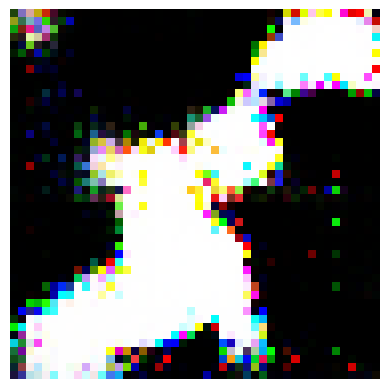

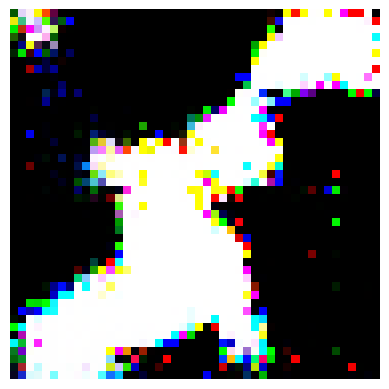

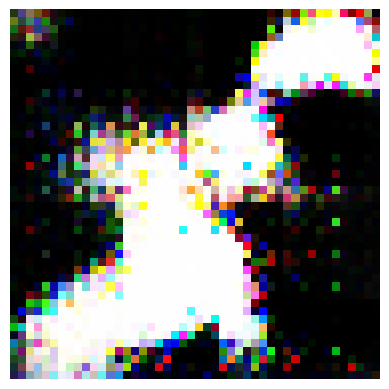

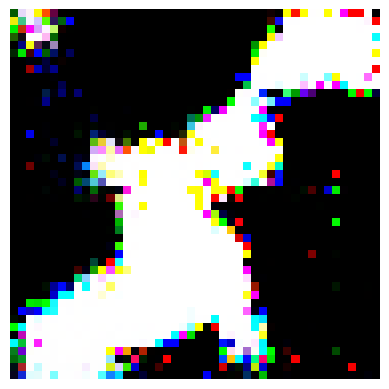

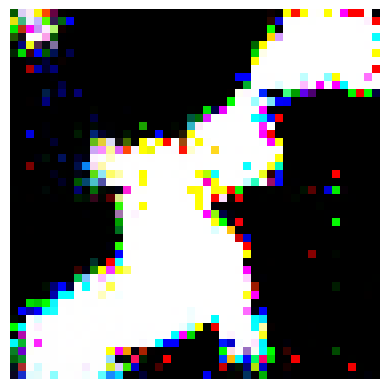

Epoch 101/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 101: Generator Loss: 0.0248, Discriminator Loss: 0.0058
Epoch 102/500


100%|██████████| 7/7 [00:11<00:00,  1.65s/it]


Epoch 102: Generator Loss: 0.0237, Discriminator Loss: 0.0051
Epoch 103/500


  0%|          | 0/7 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [47]:
import torch
from tqdm import tqdm  # For progress bar

EPOCHS = 500
z_dim = 16

# Training Loop
for epoch in range(EPOCHS):
    print(f"Epoch {epoch+1}/{EPOCHS}")
    epoch_gen_loss = 0.0  # Track generator loss over the epoch
    epoch_disc_loss = 0.0  # Track discriminator loss over the epoch

    for real in tqdm(dataloader):
        real_images = real[0].to(device)  # Move real images to the correct device
        cur_batch_size = len(real_images)  # Get batch size

        # Train Discriminator
        disc_opt.zero_grad()
        disc_loss_val = disc_loss(gen, disc, real_images, cur_batch_size, z_dim=z_dim)
        disc_loss_val.backward()
        disc_opt.step()

        # Train Generator
        gen_opt.zero_grad()
        gen_loss_val = gen_loss(gen, disc, cur_batch_size, z_dim=z_dim)
        gen_loss_val.backward()
        gen_opt.step()

        # Accumulate loss for the epoch
        epoch_gen_loss += gen_loss_val.item()
        epoch_disc_loss += disc_loss_val.item()

    # Average losses
    avg_gen_loss = epoch_gen_loss / len(dataloader)
    avg_disc_loss = epoch_disc_loss / len(dataloader)

    print(f"Epoch {epoch+1}: Generator Loss: {avg_gen_loss:.4f}, Discriminator Loss: {avg_disc_loss:.4f}")

    # Generate and visualize images every few epochs
    if (epoch + 1) % 50 == 0 or epoch == EPOCHS - 1:  # Modify as needed
        num_images_to_generate = 5
        noise = torch.randn(num_images_to_generate, z_dim).to(device)
        with torch.no_grad():
            fake_images = gen(noise)
        # Visualize generated images
        for i in range(num_images_to_generate):
            image_tensor = fake_images[i].detach().cpu()
            image_tensor = denormalize(image_tensor, mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))  # Denormalize
            image_tensor = image_tensor.clamp(0, 1)  # Clamp values to [0, 1]
            image_numpy = image_tensor.permute(1, 2, 0).numpy()  # Convert to HWC for plt.imshow
            plt.imshow(image_numpy)
            plt.axis("off")
            plt.show()


Generated tensor shape: torch.Size([5, 3, 46, 46])


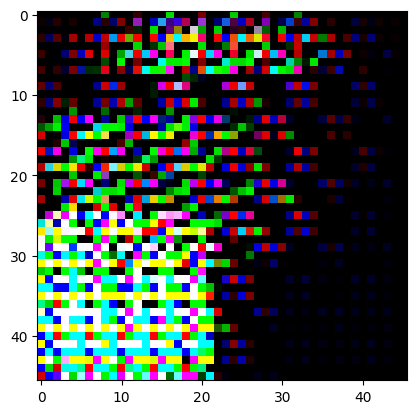

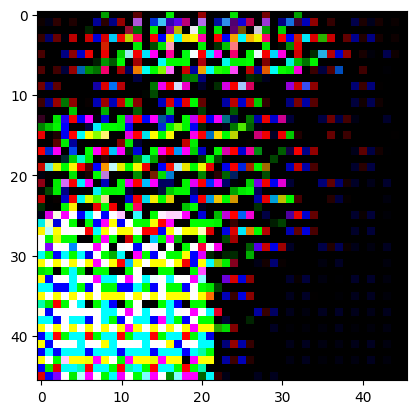

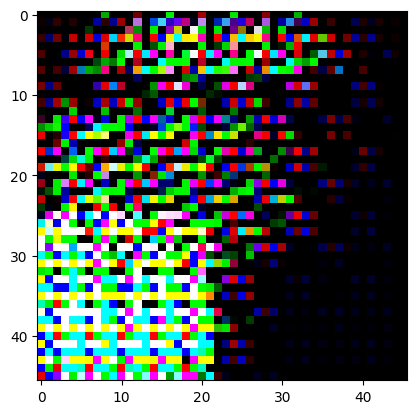

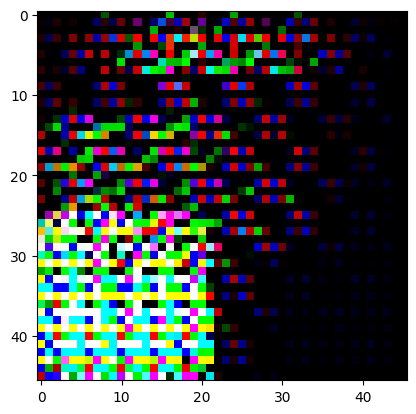

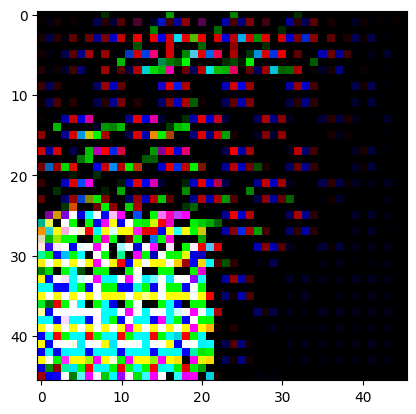

In [30]:
num_images_to_generate = 5
# Create random noise tensor
noise = torch.rand(num_images_to_generate,16).to(device)

# Generate images
with torch.no_grad():
    fake = gen(noise).to(device)
print(f"Generated tensor shape: {fake.shape}")

for i in range(num_images_to_generate):
    # Slice fake to select i-th image
    image_tensor = fake[i,:,:,:]
    # Permute the image dimensions
    image_tensor_permuted = image_tensor.permute(1,2,0)
    image_numpy = image_tensor_permuted.cpu().numpy()
    plt.imshow(image_numpy)
    plt.show()